## Heart disease prediction


## Importing important Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the dataset

In [43]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data preprocessing

## Checking if there is any null /missing values in dataset

In [44]:

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Insight - No Null/missing Values Present

## Checking datatypes and non null value count 

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## checking duplicates

In [46]:
data.duplicated().sum()

723

## insight - 723 duplicates present

## Checking Statistics of dataset

In [47]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Check various specifications present in the different columns

In [48]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [49]:
data['chest_pain_type'] = data['cp']
data['cholestrol']= data['chol']
data['resting_blood_pressure'] = data['trestbps']
data['fasting_blood_sugar'] = data['fbs']
data['resting_electrocardiogram'] = data['restecg']
data['max_heart_rate_achieved'] = data['thalach']
data['exercise_induced_angina'] = data['exang']
data['st_depression'] = data['oldpeak']
data['st_slope'] = data['slope']
data['num_major_vessels'] = data['ca']
data['thalassemia'] = data['thal']

In [50]:
start_index = 2
end_index = 13
data = data.drop(data.columns[start_index:end_index], axis=1)

In [51]:
data.head()

,age,sex,target,chest_pain_type,cholestrol,resting_blood_pressure,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,52,1,0,0,212,125,0,1,168,0,1.0,2,2,3
1,53,1,0,0,203,140,1,0,155,1,3.1,0,0,3
2,70,1,0,0,174,145,0,1,125,1,2.6,0,0,3
3,61,1,0,0,203,148,0,1,161,0,0.0,2,1,3
4,62,0,0,0,294,138,1,1,106,0,1.9,1,3,2


In [52]:
data.describe()

,age,sex,target,chest_pain_type,cholestrol,resting_blood_pressure,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.513171,0.942439,246.00000,131.611707,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,0.500070,1.029641,51.59251,17.516718,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,0.000000,126.00000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,0.000000,211.00000,120.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,1.000000,240.00000,130.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,1.000000,2.000000,275.00000,140.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,1.000000,3.000000,564.00000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


#### Insights :

Age:
  1) average age in the dataset is 54 years
  2) Maximum age is 77 years and minimum age is 29 years
  
Cholestrol:
  1) The Average registered cholestrol is 246
  2) Maximum level of cholestrol regiestered is 564 and minimum level is 126
  3) Note: According to WHO , a healthy cholesterol level is  <200mg/dl and usually high level of cholesterol is associated with      heart disease.
  
Resting Blood Pressure :
  1) max = 200 , min = 94 , avg = 131
  
Heart Rate Achieved :
  1) max = 202 , min = 71 , avg = 149
  
Depression:
  1) The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0
  
Number of major blood vessels:
  1) A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.

## Seperating columns with numerical/categorical data

In [53]:
data_numerical_features = data.select_dtypes(include='number')

In [54]:
data_numerical_features

,age,sex,target,chest_pain_type,cholestrol,resting_blood_pressure,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,52,1,0,0,212,125,0,1,168,0,1.0,2,2,3
1,53,1,0,0,203,140,1,0,155,1,3.1,0,0,3
2,70,1,0,0,174,145,0,1,125,1,2.6,0,0,3
3,61,1,0,0,203,148,0,1,161,0,0.0,2,1,3
4,62,0,0,0,294,138,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,1,221,140,0,1,164,1,0.0,2,0,2
1021,60,1,0,0,258,125,0,0,141,1,2.8,1,1,3
1022,47,1,0,0,275,110,0,0,118,1,1.0,1,1,2
1023,50,0,1,0,254,110,0,0,159,0,0.0,2,0,2


In [55]:
data_categorical_features = data.select_dtypes(include = 'category')

In [56]:
data_categorical_features

""
0
1
2
3
4
...
1020
1021
1022
1023


## Insight - All columns are with numerical data

## Data Visualization

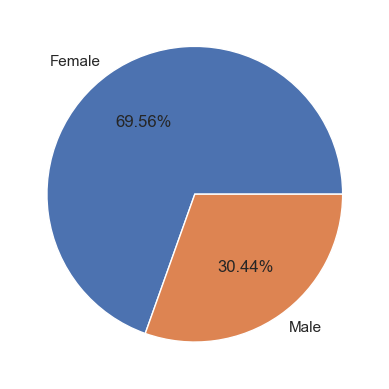

In [57]:
fig, ax = plt.subplots()
ax.pie(data['sex'].value_counts(),labels = ['Female','Male'],autopct ='%.2f%%' )
plt.show()


## Cholesterol Level by Age Category and Gender

E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age_category', ylabel='cholestrol'>

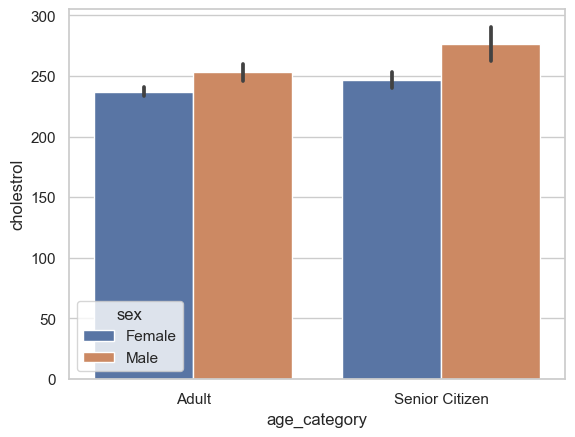

In [58]:
def categorize_age(age):
    if age <= 18:
        return 'Children'
    elif 18 < age <= 60:
        return 'Adult'
    else:
        return 'Senior Citizen'
    
label_gender = data['sex'].map({1:'Female',0:'Male'})
data['age_category'] = data['age'].apply(categorize_age)
sns.barplot(x='age_category', y ='cholestrol', hue=label_gender , data=data)


## Checking target variable specifications

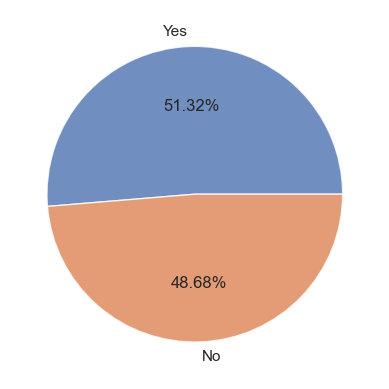

In [59]:
fig, ax = plt.subplots()
ax.pie(data['target'].value_counts(),labels =['Yes' , 'No'],autopct = '%.2f%%',wedgeprops=dict(alpha=0.8))
plt.show()

## Heart Disease based on gender

E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sex', ylabel='count'>

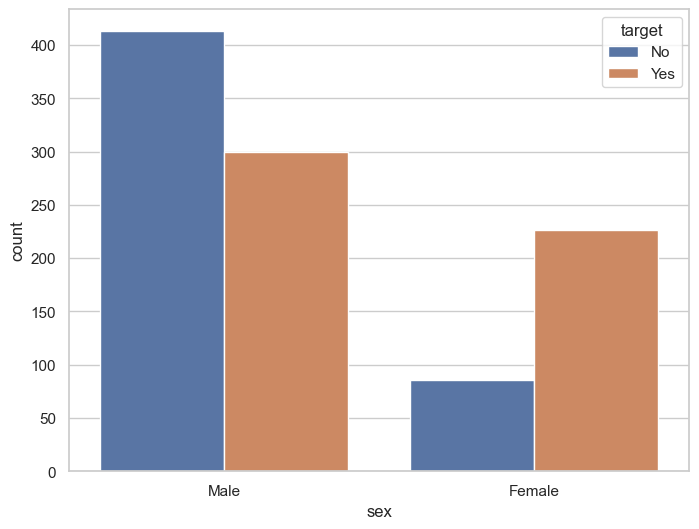

In [60]:
label_gender = data['sex'].map({1:'Male',0:'Female'})
label_target = data['target'].map({1:'Yes',0:'No'})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(x=label_gender,hue = label_target , data=data)

## Chest Pain VS Gender

E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\pythonprojects\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sex', ylabel='count'>

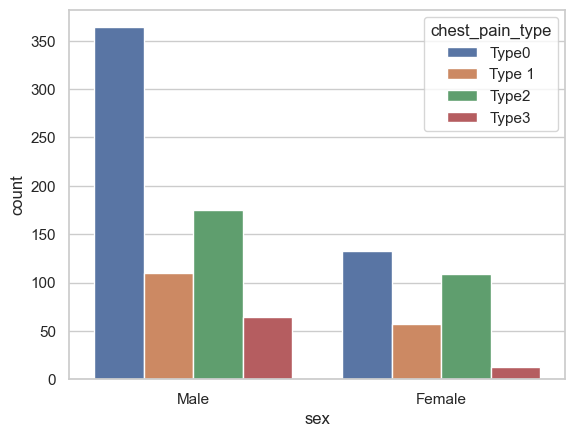

In [61]:
label_chest_pain = data['chest_pain_type'].map({0: 'Type0', 1:'Type 1', 2:'Type2' , 3:'Type3'})
sns.countplot(x=label_gender , hue = label_chest_pain , data = data)

In [62]:
import pickle 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [63]:
data = data.drop(['age_category'],axis=1)
x = data.drop(['target'],axis=1)

y = data['target']

In [64]:
x

,age,sex,chest_pain_type,cholestrol,resting_blood_pressure,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,52,1,0,212,125,0,1,168,0,1.0,2,2,3
1,53,1,0,203,140,1,0,155,1,3.1,0,0,3
2,70,1,0,174,145,0,1,125,1,2.6,0,0,3
3,61,1,0,203,148,0,1,161,0,0.0,2,1,3
4,62,0,0,294,138,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,221,140,0,1,164,1,0.0,2,0,2
1021,60,1,0,258,125,0,0,141,1,2.8,1,1,3
1022,47,1,0,275,110,0,0,118,1,1.0,1,1,2
1023,50,0,0,254,110,0,0,159,0,0.0,2,0,2


In [65]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [66]:
X_train,X_test,Y_Train,Y_test = train_test_split(x,y,test_size=0.20, random_state =20)

In [67]:
x.shape,y.shape,X_train.shape,Y_Train.shape,X_test.shape,Y_test.shape

((1025, 13), (1025,), (820, 13), (820,), (205, 13), (205,))

In [68]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [69]:
models = {'Logistic Regression ': LogisticRegression(),
          'Naive Bayes' : GaussianNB(),
         'Randome Forest Classifier' : RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5),
         'Descision Tress' : DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6),
         'K Nearest Neghbours' : KNeighborsClassifier(n_neighbors=10)
         }

In [72]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
F1__score_list = []


for model_name,model in models.items():
    model.fit(X_train,Y_Train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    recall = recall_score(Y_test,y_pred)
    F1__score = f1_score(Y_test,y_pred)
    conf_matrix_result = confusion_matrix(Y_test,y_pred)
    
    print('Name of the model : ' , model_name)
    print("Accuracy of the model is " , accuracy)
    print("Pecision score =  " , precision)
    print("recall score =  " , recall)
    print("F1-score = " , F1__score)
    print("Confusion Matrix = " , conf_matrix_result)
    
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    F1__score_list.append(F1__score)
    
    print("=" * 35)
    print('\n')
    

Name of the model :  Logistic Regression 
Accuracy of the model is  0.7951219512195122
Pecision score =   0.7622950819672131
recall score =   0.8773584905660378
F1-score =  0.8157894736842105
Confusion Matrix =  [[70 29]
 [13 93]]


Name of the model :  Naive Bayes
Accuracy of the model is  0.8
Pecision score =   0.782608695652174
recall score =   0.8490566037735849
F1-score =  0.8144796380090499
Confusion Matrix =  [[74 25]
 [16 90]]


Name of the model :  Randome Forest Classifier
Accuracy of the model is  0.9170731707317074
Pecision score =   0.8803418803418803
recall score =   0.9716981132075472
F1-score =  0.9237668161434976
Confusion Matrix =  [[ 85  14]
 [  3 103]]


Name of the model :  Descision Tress
Accuracy of the model is  0.9317073170731708
Pecision score =   0.8898305084745762
recall score =   0.9905660377358491
F1-score =  0.9374999999999999
Confusion Matrix =  [[ 86  13]
 [  1 105]]


Name of the model :  K Nearest Neghbours
Accuracy of the model is  0.8731707317073171